In [108]:
%load_ext autoreload
%autoreload 2

import sys
from particles_em import EM
import warnings
import numpy as np

warnings.filterwarnings("ignore")
sys.path.insert(0, 'util')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
size_filepaths = [f'{i}-sizes.csv' for i in range(1, 21)]
x_filepaths = [f'{i}-xsteps.csv' for i in range(1, 21)]
y_filepaths = [f'{i}-ysteps.csv' for i in range(1, 21)]

In [105]:
em_ = EM(size_filepaths, x_filepaths, y_filepaths)

После инициализации объект будет иметь атрибуты: 

sizes_all -- список датафреймов с реальными размерами частиц

x_all -- список датафреймов с перемещениями частиц

In [87]:
len(em_.x_all)

40

In [107]:
em_.estimate_gamma_params() # метод для вычисления оценок a, b

(4.300689340938588, 0.012372847743394666)

После вычисления оценок объект будет содержать методы:

a, b -- оценки параметров 

sigmas_all -- итоговые оценки sigma^2 

sigma1_all -- итоговые оценки sigma1^2 для каждого набора

sigmas_hist_all -- список списков, содержащий историю обучения sigma^2

sigma1_hist_all -- список списков, содержащий историю обучения sigma1^2

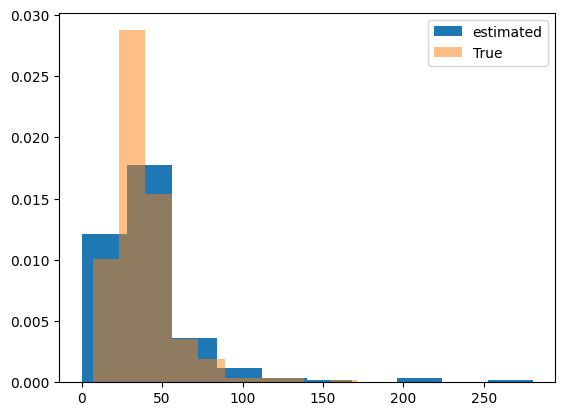

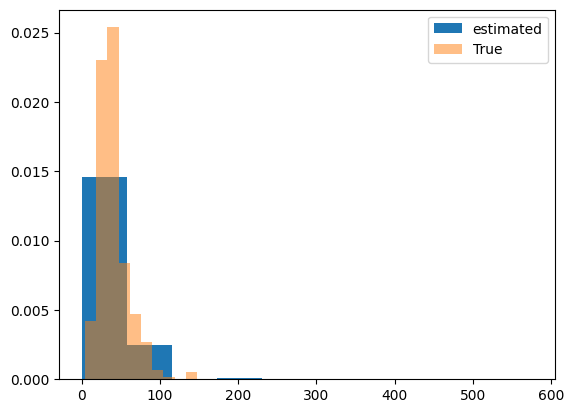

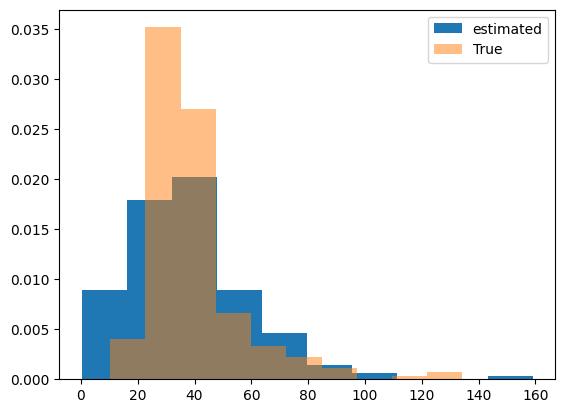

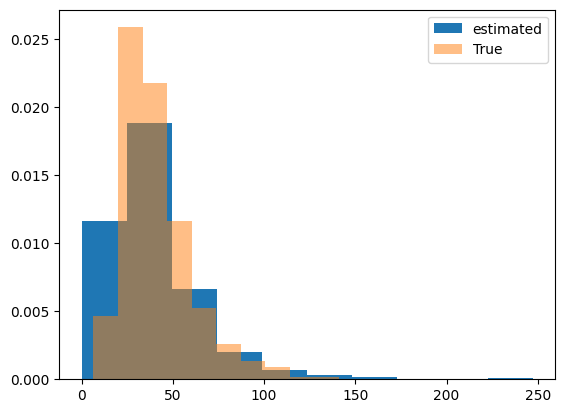

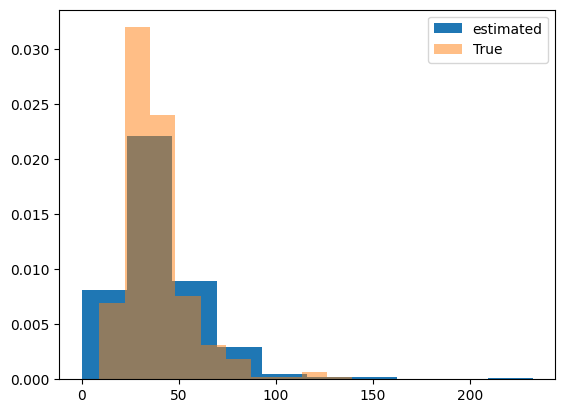

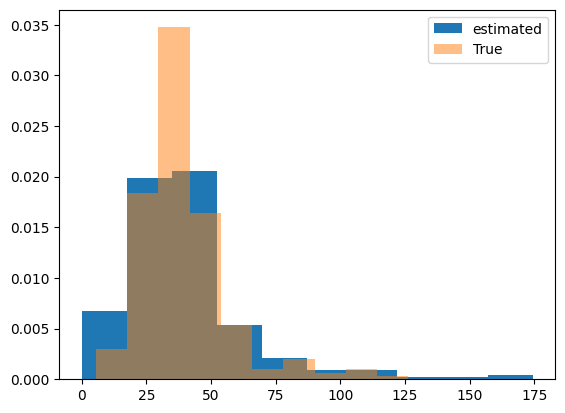

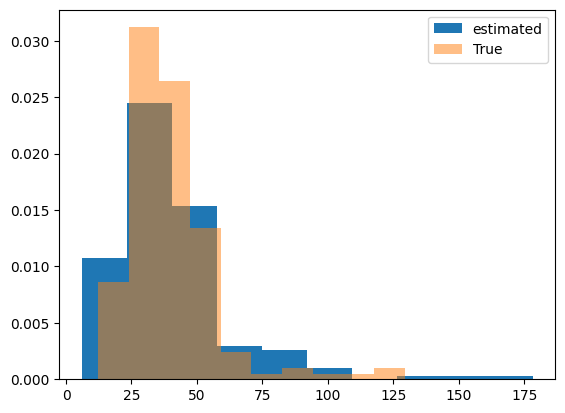

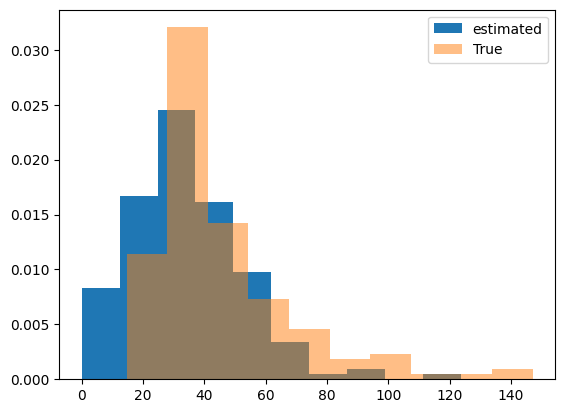

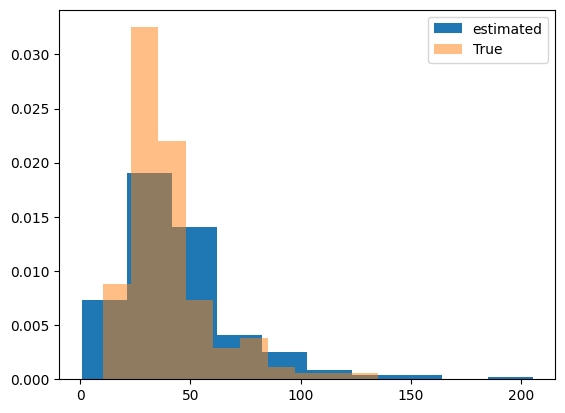

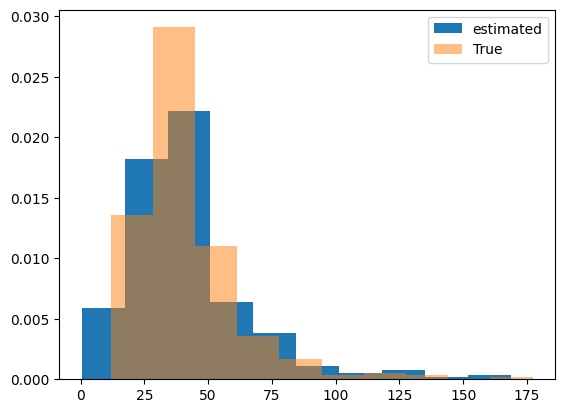

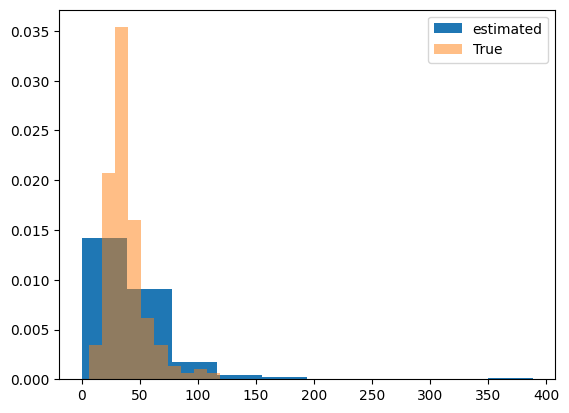

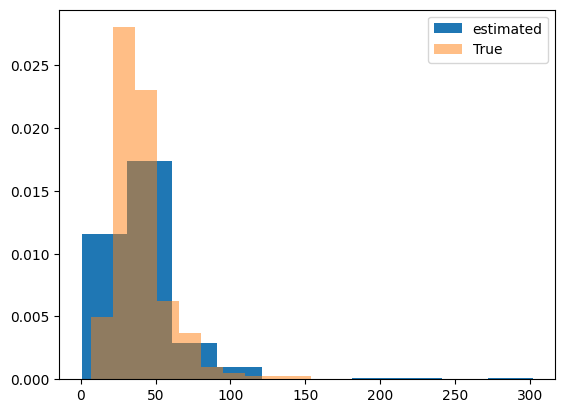

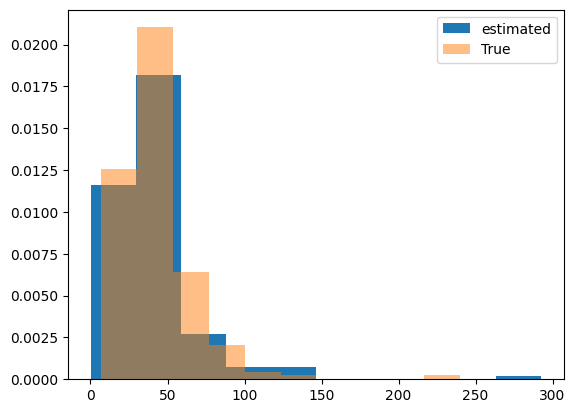

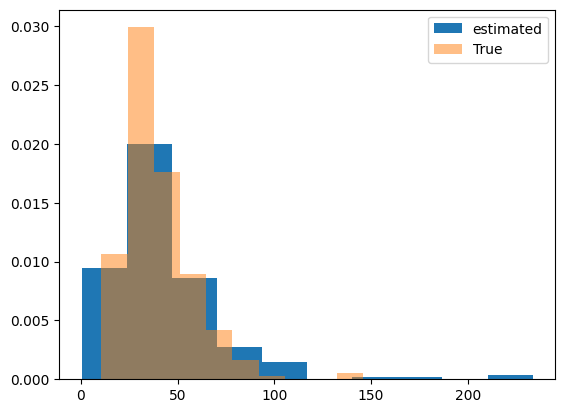

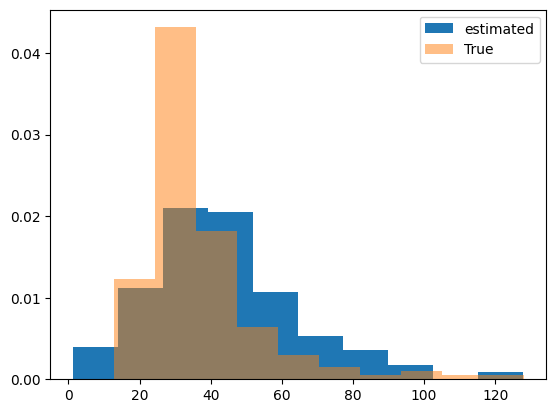

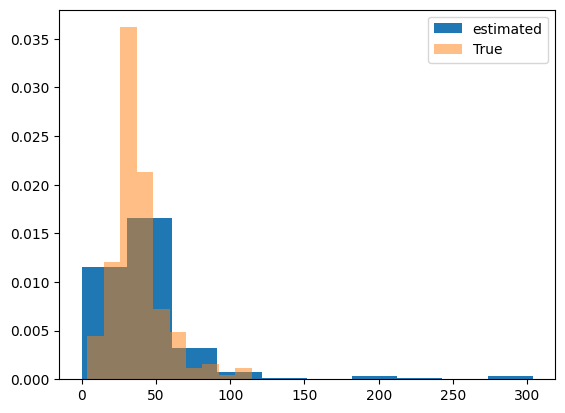

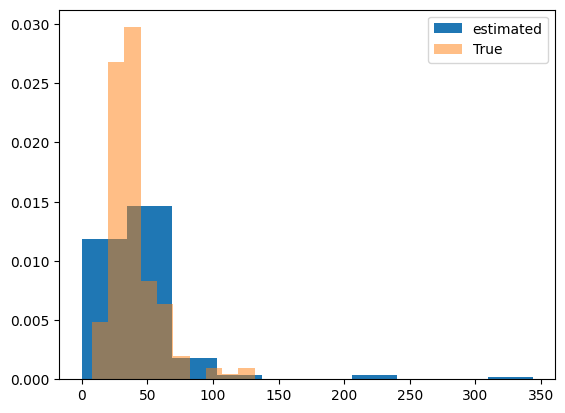

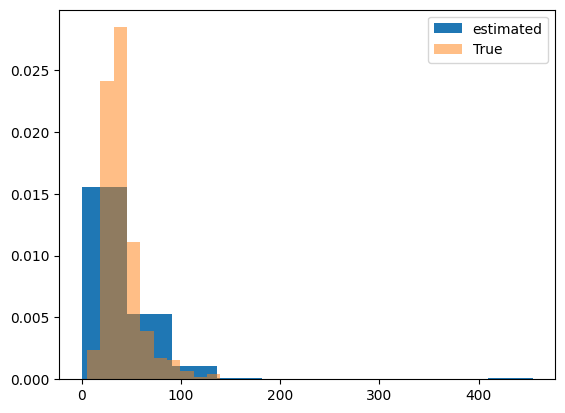

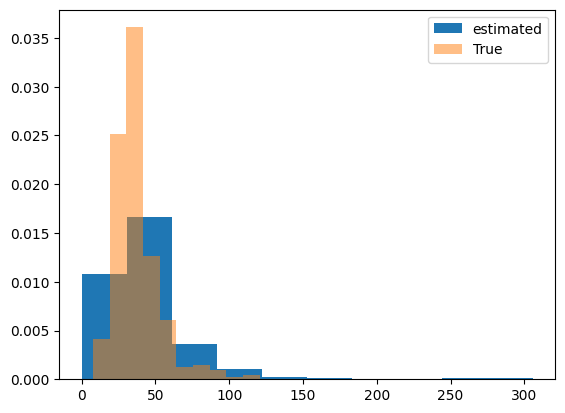

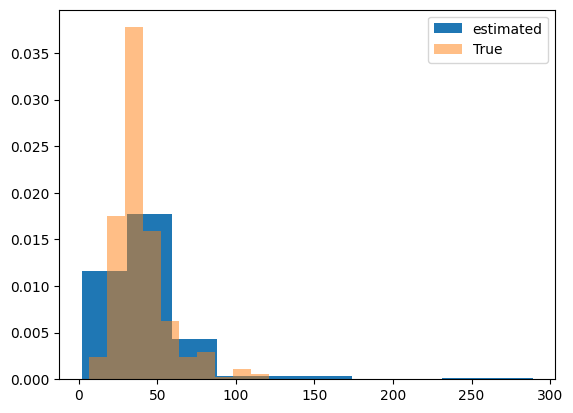

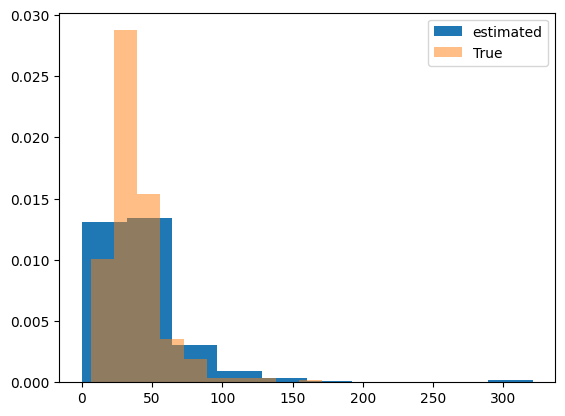

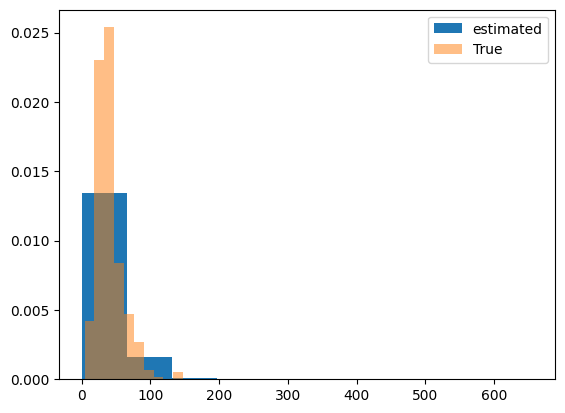

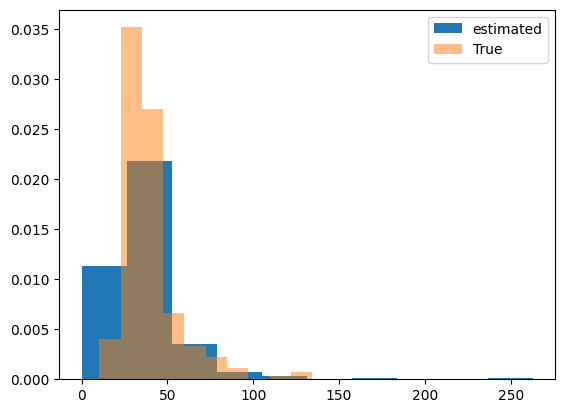

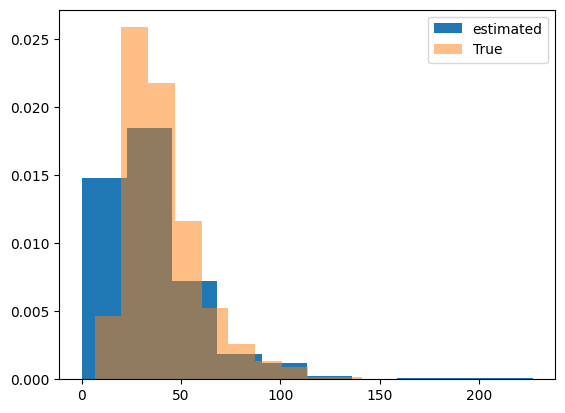

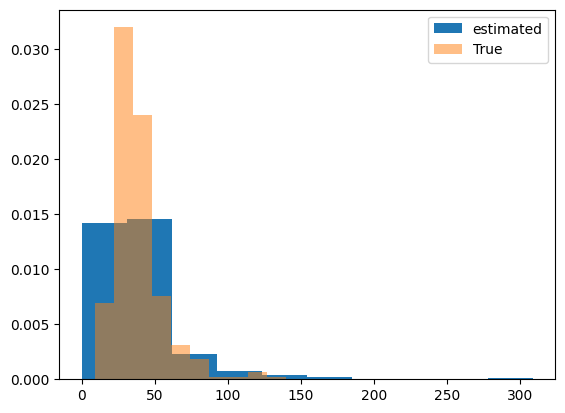

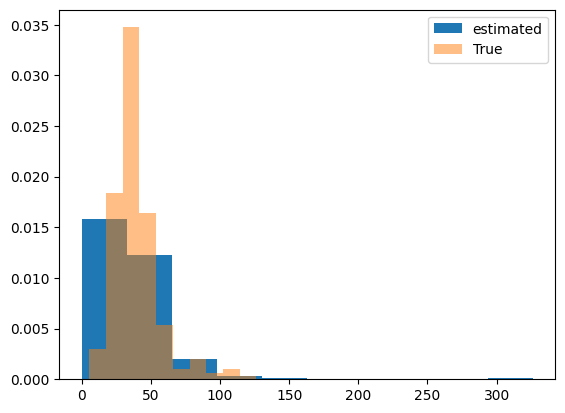

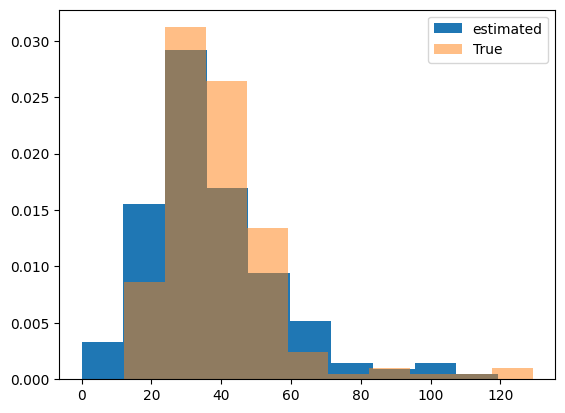

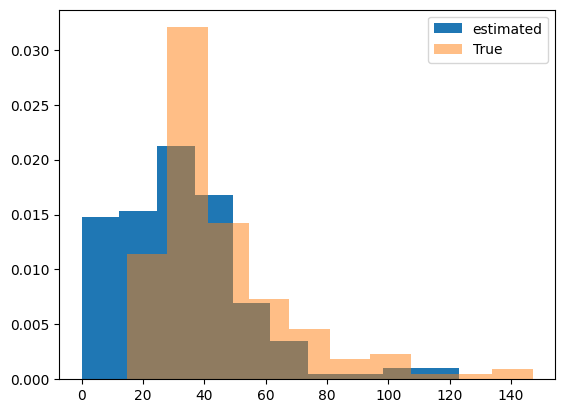

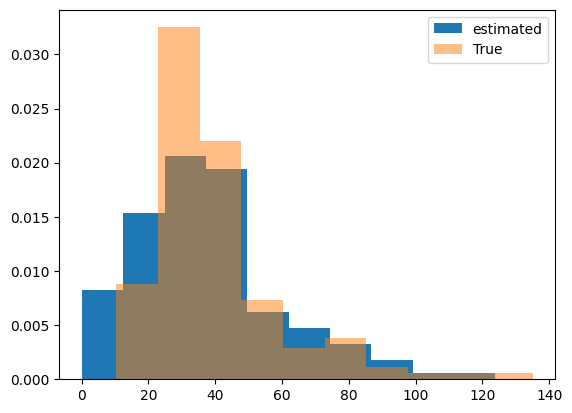

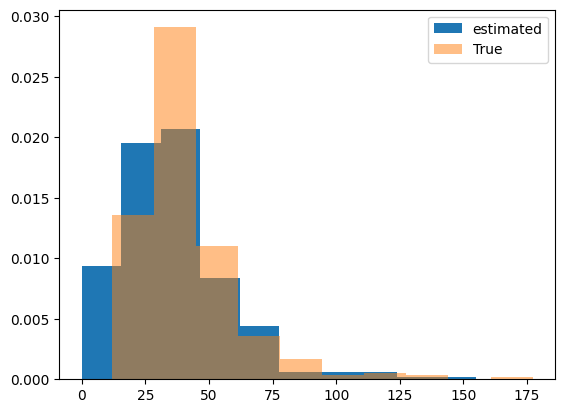

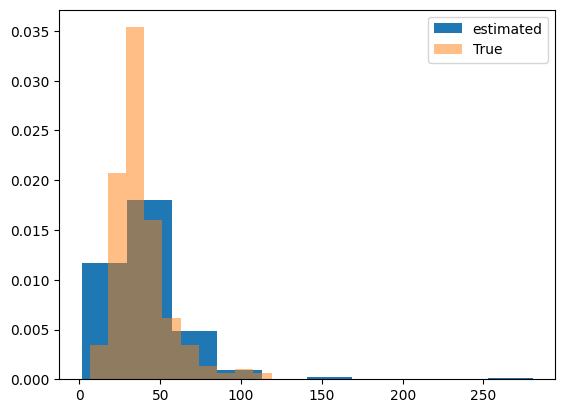

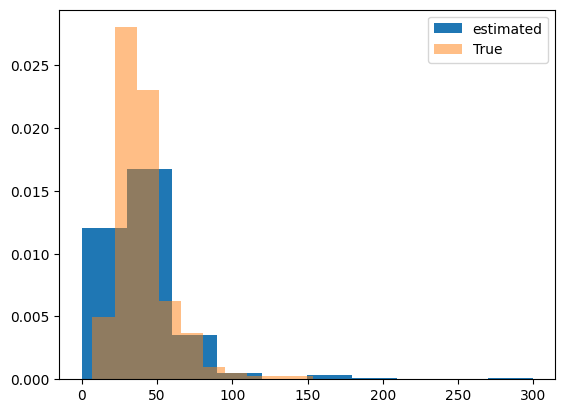

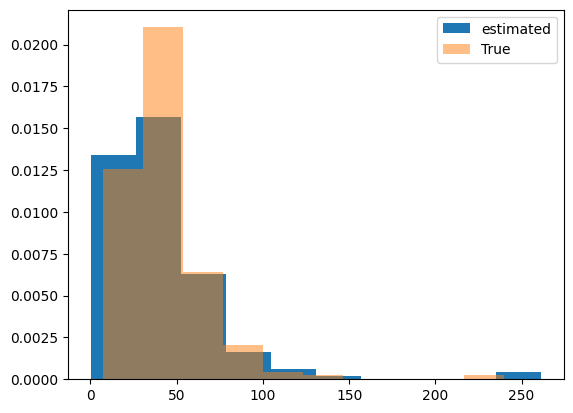

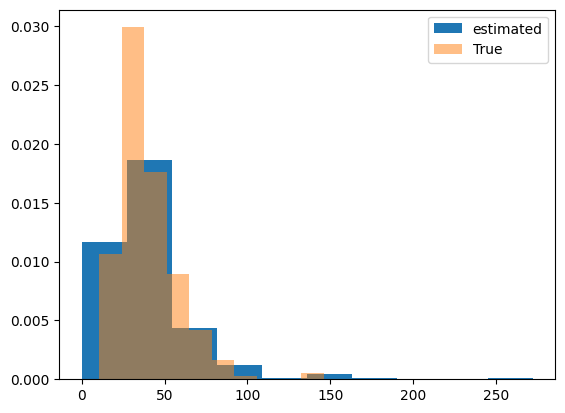

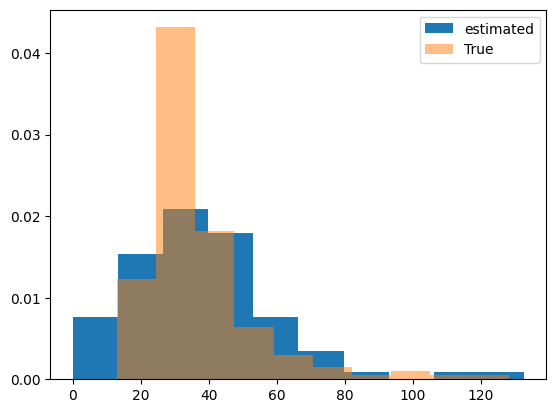

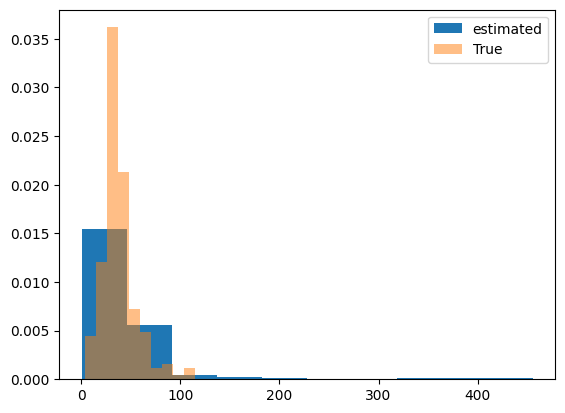

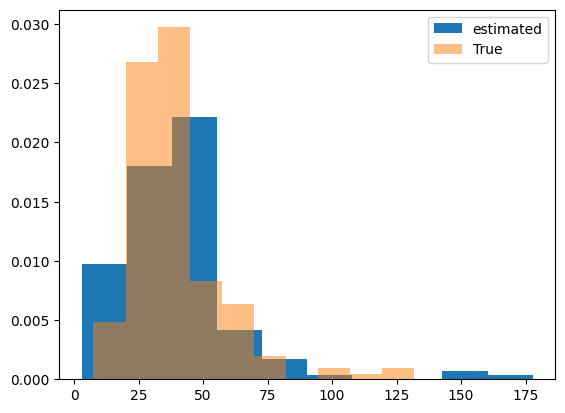

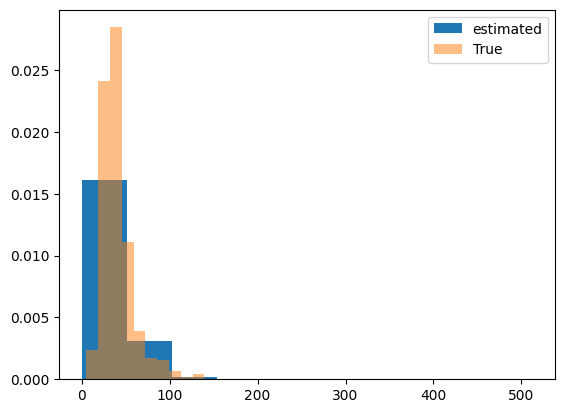

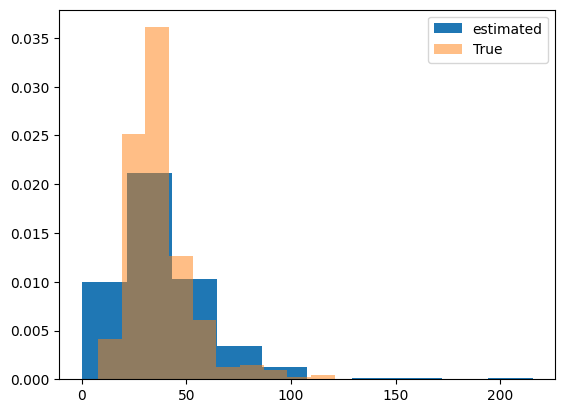

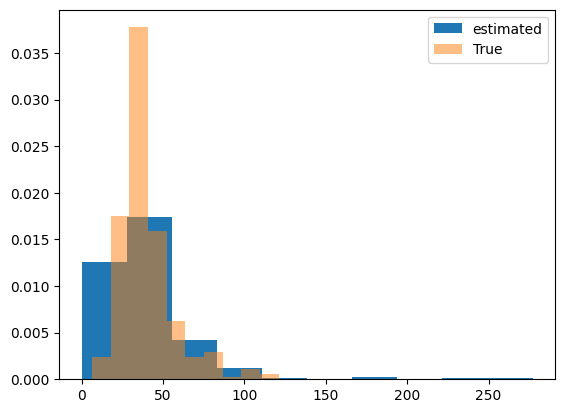

In [ ]:
# Отображаем оцененные sigma

import matplotlib.pyplot as plt

coef = np.mean([np.mean(em_.sizes_all[i]['Size, nm']) / np.mean(em_.sigmas_all[i]) for i in range(len(em_.sizes_all))])

for i in range(len(em_.sigmas_all)):
    plt.hist(np.array(em_.sigmas_all[i]) * coef,density=True, label='estimated')
    plt.hist(em_.sizes_all[i]['Size, nm'], density=True, label='True', alpha=0.5)
    plt.legend()
    plt.show()